In [7]:
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from gensim.corpora import WikiCorpus
import jieba
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
plt.rcParams["font.sans-serif"] = ["Microsoft YaHei"]
plt.rcParams['axes.unicode_minus'] = False

from cython.parallel import prange
from io import open
import pandas as pd
import logging
from wordcloud import WordCloud
import numpy as np

In [8]:
"*******Data pre-processing, cut words and generate word list***********"
space = ' '
i = 0
l = []
zhwiki_name = 'C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/zhwiki-20190720-pages-articles-multistream.xml.bz2'
f = open('C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/zhwiki.txt', 'w',encoding='utf-8')
wiki = WikiCorpus(zhwiki_name, lemmatize=False, dictionary={}) #从xml文件中读出训练语料
for text in wiki.get_texts():
    for i in prange(len(text), nogil=True):
        temp_sentence = text[i]
        seg_list = list(jieba.cut(temp_sentence)) #分词
        for temp_term in seg_list:
            l.append(temp_term)
    f.write(space.join(l) + '\n')
    l = []
    i = i + 1

    if (i %200 == 0):
        print('Saved ' + str(i) + ' articles')
f.close()
 

Saved 200 articles
Saved 400 articles
Saved 200 articles
Saved 200 articles
Saved 400 articles
Saved 600 articles
Saved 600 articles
Saved 400 articles
Saved 400 articles
Saved 200 articles
Saved 1000 articles
Saved 600 articles
Saved 200 articles
Saved 800 articles
Saved 600 articles
Saved 200 articles
Saved 200 articles
Saved 400 articles
Saved 400 articles
Saved 400 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 800 articles
Saved 200 articles
Saved 200 articles
Saved 600 articles
Saved 800 articles
Saved 200 articles
Saved 600 articles
Saved 400 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 400 articles
Saved 600 articles
Saved 1600 articles
Saved 400 articles
Saved 200 articles
Saved 2200 articles
Saved 400 articles
Saved 200 articles
Saved 1200 articles
Saved 200 articles
Saved 400 articles
Saved 600 articles
Saved 200 articles
Saved 26

Saved 200 articles
Saved 200 articles
Saved 400 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 1400 articles
Saved 200 articles
Saved 200 articles
Saved 400 articles
Saved 200 articles
Saved 1600 articles
Saved 400 articles
Saved 200 articles
Saved 200 articles
Saved 1600 articles
Saved 200 articles
Saved 200 articles
Saved 400 articles
Saved 200 articles
Saved 400 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 600 articles
Saved 400 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 400 articles
Saved 600 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 400 articles
Saved 400 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 400 articles
Saved 200 articles
Saved 600 articles
Saved 200 articles
Saved 600 articles
Saved 1600 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 200 articles
Saved 60

2019-08-03 02:58:50,691 : INFO : finished iterating over Wikipedia corpus of 343641 documents with 78921038 positions (total 3326902 articles, 93250619 positions before pruning articles shorter than 50 words)


In [9]:
"*******Generate model**********"
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

wiki_news = open('C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/zhwiki.txt', 'r',encoding='utf-8')
print('~~~开始生成词向量模型~~~~请耐心等待')
model = Word2Vec(LineSentence(wiki_news), sg=0,size=200, window=5, min_count=5, workers=6)
print('~~~等待是有回报的~~~~词向量模型已经生成')
model.save('C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec')


2019-08-03 02:58:50,875 : INFO : collecting all words and their counts
2019-08-03 02:58:50,909 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


~~~开始生成词向量模型~~~~请耐心等待


2019-08-03 02:58:57,553 : INFO : PROGRESS: at sentence #10000, processed 12670204 words, keeping 860698 word types
2019-08-03 02:59:02,121 : INFO : PROGRESS: at sentence #20000, processed 21948899 words, keeping 1268545 word types
2019-08-03 02:59:06,738 : INFO : PROGRESS: at sentence #30000, processed 30227535 words, keeping 1569052 word types
2019-08-03 02:59:10,556 : INFO : PROGRESS: at sentence #40000, processed 37959733 words, keeping 1837446 word types
2019-08-03 02:59:14,320 : INFO : PROGRESS: at sentence #50000, processed 45207952 words, keeping 2071466 word types
2019-08-03 02:59:17,973 : INFO : PROGRESS: at sentence #60000, processed 52049027 words, keeping 2287396 word types
2019-08-03 02:59:21,621 : INFO : PROGRESS: at sentence #70000, processed 58635467 words, keeping 2482676 word types
2019-08-03 02:59:25,058 : INFO : PROGRESS: at sentence #80000, processed 64819767 words, keeping 2664936 word types
2019-08-03 02:59:28,624 : INFO : PROGRESS: at sentence #90000, processed 

2019-08-03 03:01:49,168 : INFO : PROGRESS: at 0.79% examples, 444327 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:01:50,191 : INFO : PROGRESS: at 0.83% examples, 446150 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:01:51,193 : INFO : PROGRESS: at 0.86% examples, 448152 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:01:52,194 : INFO : PROGRESS: at 0.90% examples, 450100 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:01:53,204 : INFO : PROGRESS: at 0.93% examples, 451714 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:01:54,211 : INFO : PROGRESS: at 0.97% examples, 453300 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:01:55,214 : INFO : PROGRESS: at 1.01% examples, 454569 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:01:56,215 : INFO : PROGRESS: at 1.05% examples, 455872 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:01:57,218 : INFO : PROGRESS: at 1.08% examples, 456965 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:01:58,220 : INFO : PROGRESS: at 1.12% examples, 458214 words/s, in_q

2019-08-03 03:03:10,950 : INFO : PROGRESS: at 4.37% examples, 492378 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:03:11,960 : INFO : PROGRESS: at 4.42% examples, 492578 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:03:12,970 : INFO : PROGRESS: at 4.47% examples, 492771 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:03:13,982 : INFO : PROGRESS: at 4.53% examples, 493109 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:03:14,989 : INFO : PROGRESS: at 4.58% examples, 493387 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:03:16,003 : INFO : PROGRESS: at 4.64% examples, 493582 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:03:17,013 : INFO : PROGRESS: at 4.69% examples, 493822 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:03:18,017 : INFO : PROGRESS: at 4.74% examples, 494041 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:03:19,021 : INFO : PROGRESS: at 4.79% examples, 494181 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:03:20,032 : INFO : PROGRESS: at 4.84% examples, 494539 words/s, in_q

2019-08-03 03:04:32,879 : INFO : PROGRESS: at 9.00% examples, 505523 words/s, in_qsize 0, out_qsize 2
2019-08-03 03:04:33,892 : INFO : PROGRESS: at 9.07% examples, 505655 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:04:34,909 : INFO : PROGRESS: at 9.13% examples, 505731 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:04:35,923 : INFO : PROGRESS: at 9.19% examples, 505838 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:04:36,924 : INFO : PROGRESS: at 9.24% examples, 505950 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:04:37,951 : INFO : PROGRESS: at 9.30% examples, 505996 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:04:38,965 : INFO : PROGRESS: at 9.36% examples, 506082 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:04:39,972 : INFO : PROGRESS: at 9.42% examples, 506197 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:04:40,973 : INFO : PROGRESS: at 9.48% examples, 506101 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:04:41,980 : INFO : PROGRESS: at 9.54% examples, 506262 words/s, in_q

2019-08-03 03:05:53,712 : INFO : PROGRESS: at 14.17% examples, 515148 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:05:54,717 : INFO : PROGRESS: at 14.23% examples, 514933 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:05:55,729 : INFO : PROGRESS: at 14.29% examples, 514971 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:05:56,737 : INFO : PROGRESS: at 14.34% examples, 515029 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:05:57,745 : INFO : PROGRESS: at 14.40% examples, 515069 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:05:58,757 : INFO : PROGRESS: at 14.45% examples, 515184 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:05:59,763 : INFO : PROGRESS: at 14.52% examples, 515217 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:06:00,776 : INFO : PROGRESS: at 14.58% examples, 515223 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:06:01,786 : INFO : PROGRESS: at 14.63% examples, 515328 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:06:02,799 : INFO : PROGRESS: at 14.69% examples, 515401 wor

2019-08-03 03:07:14,473 : INFO : PROGRESS: at 19.33% examples, 518823 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:07:15,488 : INFO : PROGRESS: at 19.40% examples, 518855 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:07:16,493 : INFO : PROGRESS: at 19.47% examples, 518855 words/s, in_qsize 0, out_qsize 2
2019-08-03 03:07:17,495 : INFO : PROGRESS: at 19.54% examples, 518887 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:07:18,505 : INFO : PROGRESS: at 19.61% examples, 518961 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:07:19,511 : INFO : PROGRESS: at 19.69% examples, 519001 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:07:20,518 : INFO : PROGRESS: at 19.76% examples, 519032 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:07:21,530 : INFO : PROGRESS: at 19.84% examples, 519124 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:07:22,553 : INFO : PROGRESS: at 19.91% examples, 519146 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:07:23,561 : INFO : PROGRESS: at 19.99% examples, 519213 wor

2019-08-03 03:08:35,249 : INFO : PROGRESS: at 22.59% examples, 520801 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:08:36,265 : INFO : PROGRESS: at 22.63% examples, 520839 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:08:37,277 : INFO : PROGRESS: at 22.68% examples, 520835 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:08:38,284 : INFO : PROGRESS: at 22.72% examples, 520857 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:08:39,294 : INFO : PROGRESS: at 22.77% examples, 520890 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:08:40,297 : INFO : PROGRESS: at 22.82% examples, 520905 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:08:41,304 : INFO : PROGRESS: at 22.87% examples, 520933 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:08:42,317 : INFO : PROGRESS: at 22.92% examples, 520937 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:08:43,343 : INFO : PROGRESS: at 22.96% examples, 520934 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:08:44,352 : INFO : PROGRESS: at 23.01% examples, 520863 wor

2019-08-03 03:09:56,071 : INFO : PROGRESS: at 26.91% examples, 522409 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:09:57,081 : INFO : PROGRESS: at 26.98% examples, 522419 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:09:58,083 : INFO : PROGRESS: at 27.04% examples, 522451 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:09:59,087 : INFO : PROGRESS: at 27.11% examples, 522479 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:10:00,113 : INFO : PROGRESS: at 27.18% examples, 522514 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:10:01,120 : INFO : PROGRESS: at 27.24% examples, 522521 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:10:02,132 : INFO : PROGRESS: at 27.29% examples, 522531 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:10:03,144 : INFO : PROGRESS: at 27.35% examples, 522562 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:10:04,145 : INFO : PROGRESS: at 27.40% examples, 522584 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:10:05,155 : INFO : PROGRESS: at 27.45% examples, 522556 wor

2019-08-03 03:11:16,813 : INFO : PROGRESS: at 31.89% examples, 524243 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:11:17,814 : INFO : PROGRESS: at 31.96% examples, 524251 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:11:18,820 : INFO : PROGRESS: at 32.02% examples, 524284 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:11:19,837 : INFO : PROGRESS: at 32.09% examples, 524314 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:11:20,841 : INFO : PROGRESS: at 32.16% examples, 524326 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:11:21,852 : INFO : PROGRESS: at 32.24% examples, 524453 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:11:22,874 : INFO : PROGRESS: at 32.31% examples, 524473 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:11:23,875 : INFO : PROGRESS: at 32.37% examples, 524483 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:11:24,902 : INFO : PROGRESS: at 32.47% examples, 525154 words/s, in_qsize 5, out_qsize 1
2019-08-03 03:11:25,918 : INFO : PROGRESS: at 32.54% examples, 525207 wor

2019-08-03 03:12:37,533 : INFO : PROGRESS: at 37.03% examples, 526327 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:12:38,554 : INFO : PROGRESS: at 37.10% examples, 526348 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:12:39,563 : INFO : PROGRESS: at 37.17% examples, 526352 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:12:40,579 : INFO : PROGRESS: at 37.25% examples, 526371 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:12:41,586 : INFO : PROGRESS: at 37.32% examples, 526394 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:12:42,588 : INFO : PROGRESS: at 37.38% examples, 526397 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:12:43,604 : INFO : PROGRESS: at 37.45% examples, 526405 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:12:44,608 : INFO : PROGRESS: at 37.52% examples, 526413 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:12:45,612 : INFO : PROGRESS: at 37.59% examples, 526411 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:12:46,624 : INFO : PROGRESS: at 37.66% examples, 526413 wor

2019-08-03 03:13:58,345 : INFO : PROGRESS: at 41.16% examples, 527381 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:13:59,362 : INFO : PROGRESS: at 41.20% examples, 527387 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:14:00,391 : INFO : PROGRESS: at 41.23% examples, 527389 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:14:01,394 : INFO : PROGRESS: at 41.27% examples, 527390 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:14:02,400 : INFO : PROGRESS: at 41.31% examples, 527394 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:14:03,400 : INFO : PROGRESS: at 41.35% examples, 527399 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:14:04,404 : INFO : PROGRESS: at 41.39% examples, 527403 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:14:05,408 : INFO : PROGRESS: at 41.43% examples, 527378 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:14:06,409 : INFO : PROGRESS: at 41.47% examples, 527368 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:14:07,436 : INFO : PROGRESS: at 41.51% examples, 527352 wor

2019-08-03 03:15:19,160 : INFO : PROGRESS: at 45.00% examples, 527670 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:15:20,173 : INFO : PROGRESS: at 45.06% examples, 527684 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:15:21,176 : INFO : PROGRESS: at 45.11% examples, 527701 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:15:22,180 : INFO : PROGRESS: at 45.17% examples, 527709 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:15:23,191 : INFO : PROGRESS: at 45.23% examples, 527723 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:15:24,192 : INFO : PROGRESS: at 45.28% examples, 527749 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:15:25,194 : INFO : PROGRESS: at 45.34% examples, 527744 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:15:26,195 : INFO : PROGRESS: at 45.40% examples, 527769 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:15:27,206 : INFO : PROGRESS: at 45.45% examples, 527763 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:15:28,231 : INFO : PROGRESS: at 45.51% examples, 527769 wor

2019-08-03 03:16:40,010 : INFO : PROGRESS: at 49.72% examples, 528293 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:16:41,011 : INFO : PROGRESS: at 49.80% examples, 528739 words/s, in_qsize 10, out_qsize 0
2019-08-03 03:16:42,025 : INFO : PROGRESS: at 49.86% examples, 528793 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:16:43,042 : INFO : PROGRESS: at 49.92% examples, 528805 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:16:44,054 : INFO : PROGRESS: at 49.99% examples, 528810 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:16:45,069 : INFO : PROGRESS: at 50.05% examples, 528812 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:16:46,079 : INFO : PROGRESS: at 50.12% examples, 528812 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:16:47,091 : INFO : PROGRESS: at 50.18% examples, 528814 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:16:48,113 : INFO : PROGRESS: at 50.24% examples, 528819 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:16:49,113 : INFO : PROGRESS: at 50.30% examples, 528815 wo

2019-08-03 03:18:00,778 : INFO : PROGRESS: at 54.91% examples, 529383 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:18:01,790 : INFO : PROGRESS: at 54.97% examples, 529379 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:18:02,795 : INFO : PROGRESS: at 55.03% examples, 529392 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:18:03,797 : INFO : PROGRESS: at 55.09% examples, 529390 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:18:04,816 : INFO : PROGRESS: at 55.15% examples, 529373 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:18:05,818 : INFO : PROGRESS: at 55.21% examples, 529364 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:18:06,837 : INFO : PROGRESS: at 55.27% examples, 529363 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:18:07,845 : INFO : PROGRESS: at 55.33% examples, 529404 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:18:08,859 : INFO : PROGRESS: at 55.39% examples, 529406 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:18:09,873 : INFO : PROGRESS: at 55.44% examples, 529429 wor

2019-08-03 03:19:21,536 : INFO : PROGRESS: at 60.09% examples, 530206 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:19:22,548 : INFO : PROGRESS: at 60.11% examples, 530210 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:19:23,550 : INFO : PROGRESS: at 60.13% examples, 530214 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:19:24,552 : INFO : PROGRESS: at 60.16% examples, 530216 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:19:25,561 : INFO : PROGRESS: at 60.18% examples, 530204 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:19:26,575 : INFO : PROGRESS: at 60.21% examples, 530203 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:19:27,582 : INFO : PROGRESS: at 60.24% examples, 530203 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:19:28,584 : INFO : PROGRESS: at 60.27% examples, 530208 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:19:29,592 : INFO : PROGRESS: at 60.30% examples, 530202 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:19:30,599 : INFO : PROGRESS: at 60.33% examples, 530201 wor

2019-08-03 03:20:42,250 : INFO : PROGRESS: at 63.26% examples, 530240 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:20:43,258 : INFO : PROGRESS: at 63.32% examples, 530244 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:20:44,264 : INFO : PROGRESS: at 63.36% examples, 530263 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:20:45,287 : INFO : PROGRESS: at 63.41% examples, 530265 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:20:46,294 : INFO : PROGRESS: at 63.46% examples, 530271 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:20:47,301 : INFO : PROGRESS: at 63.51% examples, 530286 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:20:48,331 : INFO : PROGRESS: at 63.56% examples, 530275 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:20:49,345 : INFO : PROGRESS: at 63.61% examples, 530277 words/s, in_qsize 1, out_qsize 1
2019-08-03 03:20:50,356 : INFO : PROGRESS: at 63.66% examples, 530291 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:20:51,374 : INFO : PROGRESS: at 63.71% examples, 530286 wor

2019-08-03 03:22:03,015 : INFO : PROGRESS: at 67.75% examples, 530468 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:22:04,014 : INFO : PROGRESS: at 67.81% examples, 530473 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:22:05,060 : INFO : PROGRESS: at 67.86% examples, 530426 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:22:06,068 : INFO : PROGRESS: at 67.91% examples, 530413 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:22:07,073 : INFO : PROGRESS: at 67.97% examples, 530413 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:22:08,087 : INFO : PROGRESS: at 68.03% examples, 530407 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:22:09,098 : INFO : PROGRESS: at 68.09% examples, 530401 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:22:10,104 : INFO : PROGRESS: at 68.16% examples, 530398 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:22:11,112 : INFO : PROGRESS: at 68.22% examples, 530396 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:22:12,113 : INFO : PROGRESS: at 68.28% examples, 530396 wor

2019-08-03 03:23:23,774 : INFO : PROGRESS: at 72.88% examples, 531312 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:23:24,778 : INFO : PROGRESS: at 72.94% examples, 531317 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:23:25,785 : INFO : PROGRESS: at 73.01% examples, 531319 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:23:26,798 : INFO : PROGRESS: at 73.07% examples, 531319 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:23:27,801 : INFO : PROGRESS: at 73.13% examples, 531307 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:23:28,801 : INFO : PROGRESS: at 73.20% examples, 531316 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:23:29,812 : INFO : PROGRESS: at 73.25% examples, 531321 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:23:30,825 : INFO : PROGRESS: at 73.32% examples, 531324 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:23:31,838 : INFO : PROGRESS: at 73.38% examples, 531325 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:23:32,843 : INFO : PROGRESS: at 73.44% examples, 531344 wor

2019-08-03 03:24:44,565 : INFO : PROGRESS: at 78.10% examples, 531832 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:24:45,564 : INFO : PROGRESS: at 78.17% examples, 531837 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:24:46,572 : INFO : PROGRESS: at 78.24% examples, 531840 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:24:47,578 : INFO : PROGRESS: at 78.30% examples, 531857 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:24:48,581 : INFO : PROGRESS: at 78.36% examples, 531860 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:24:49,595 : INFO : PROGRESS: at 78.41% examples, 531904 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:24:50,603 : INFO : PROGRESS: at 78.49% examples, 531908 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:24:51,617 : INFO : PROGRESS: at 78.54% examples, 531945 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:24:52,629 : INFO : PROGRESS: at 78.61% examples, 531947 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:24:53,659 : INFO : PROGRESS: at 78.69% examples, 531948 wor

2019-08-03 03:26:05,562 : INFO : PROGRESS: at 81.79% examples, 532083 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:26:06,573 : INFO : PROGRESS: at 81.83% examples, 532058 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:26:07,581 : INFO : PROGRESS: at 81.87% examples, 532043 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:26:08,593 : INFO : PROGRESS: at 81.92% examples, 532048 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:26:09,603 : INFO : PROGRESS: at 81.96% examples, 532052 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:26:10,615 : INFO : PROGRESS: at 82.01% examples, 532055 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:26:11,616 : INFO : PROGRESS: at 82.05% examples, 532056 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:26:12,630 : INFO : PROGRESS: at 82.10% examples, 532060 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:26:13,634 : INFO : PROGRESS: at 82.15% examples, 532058 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:26:14,655 : INFO : PROGRESS: at 82.19% examples, 532062 wor

2019-08-03 03:27:26,450 : INFO : PROGRESS: at 85.88% examples, 532092 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:27:27,459 : INFO : PROGRESS: at 85.93% examples, 532090 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:27:28,465 : INFO : PROGRESS: at 85.99% examples, 532095 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:27:29,466 : INFO : PROGRESS: at 86.05% examples, 532101 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:27:30,483 : INFO : PROGRESS: at 86.10% examples, 532109 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:27:31,493 : INFO : PROGRESS: at 86.17% examples, 532115 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:27:32,494 : INFO : PROGRESS: at 86.23% examples, 532115 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:27:33,494 : INFO : PROGRESS: at 86.29% examples, 532134 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:27:34,520 : INFO : PROGRESS: at 86.35% examples, 532140 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:27:35,545 : INFO : PROGRESS: at 86.40% examples, 532144 wor

2019-08-03 03:28:47,274 : INFO : PROGRESS: at 90.73% examples, 532448 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:28:48,279 : INFO : PROGRESS: at 90.80% examples, 532444 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:28:49,291 : INFO : PROGRESS: at 90.87% examples, 532451 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:28:50,300 : INFO : PROGRESS: at 90.95% examples, 532449 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:28:51,311 : INFO : PROGRESS: at 91.02% examples, 532456 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:28:52,318 : INFO : PROGRESS: at 91.09% examples, 532458 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:28:53,330 : INFO : PROGRESS: at 91.16% examples, 532457 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:28:54,338 : INFO : PROGRESS: at 91.23% examples, 532455 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:28:55,348 : INFO : PROGRESS: at 91.31% examples, 532453 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:28:56,352 : INFO : PROGRESS: at 91.38% examples, 532456 wor

2019-08-03 03:30:07,978 : INFO : PROGRESS: at 95.90% examples, 532982 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:30:08,990 : INFO : PROGRESS: at 95.96% examples, 532977 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:30:09,999 : INFO : PROGRESS: at 96.03% examples, 532991 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:30:11,002 : INFO : PROGRESS: at 96.10% examples, 532994 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:30:12,008 : INFO : PROGRESS: at 96.16% examples, 532988 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:30:13,013 : INFO : PROGRESS: at 96.23% examples, 532990 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:30:14,022 : INFO : PROGRESS: at 96.30% examples, 532991 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:30:15,031 : INFO : PROGRESS: at 96.37% examples, 532994 words/s, in_qsize 0, out_qsize 1
2019-08-03 03:30:16,036 : INFO : PROGRESS: at 96.44% examples, 532996 words/s, in_qsize 0, out_qsize 0
2019-08-03 03:30:17,040 : INFO : PROGRESS: at 96.50% examples, 533000 wor

~~~等待是有回报的~~~~词向量模型已经生成


2019-08-03 03:31:22,768 : INFO : not storing attribute syn0norm
2019-08-03 03:31:22,770 : INFO : storing np array 'syn1neg' to C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec.syn1neg.npy
2019-08-03 03:31:35,545 : INFO : not storing attribute cum_table
2019-08-03 03:31:39,679 : INFO : saved C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec


In [12]:
"*******Test the model***********"
model = Word2Vec.load('C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec')
print(model.similarity('数学', '经济学'))

2019-08-03 09:26:21,608 : INFO : loading Word2Vec object from C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec
2019-08-03 09:26:53,146 : INFO : loading wv recursively from C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec.wv.* with mmap=None
2019-08-03 09:26:53,153 : INFO : loading syn0 from C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec.wv.syn0.npy with mmap=None
2019-08-03 09:27:02,548 : INFO : setting ignored attribute syn0norm to None
2019-08-03 09:27:02,551 : INFO : loading syn1neg from C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec.syn1neg.npy with mmap=None
2019-08-03 09:27:11,851 : INFO : setting ignored attribute cum_table to None
2019-08-03 09:27:11,852 : INFO : loaded C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec


0.5746385969167104


In [13]:
result = pd.Series(model.most_similar(u'腾讯')) #查找近义相关词
print(result)

2019-08-03 09:27:35,722 : INFO : precomputing L2-norms of word weight vectors


0      (优酷, 0.7914350032806396)
1      (乐视, 0.7615981101989746)
2       (搜狐, 0.743278980255127)
3      (网易, 0.7305467128753662)
4     (爱奇艺, 0.7252861261367798)
5      (百度, 0.7097854614257812)
6     (腾讯网, 0.6970790028572083)
7     (土豆网, 0.6933022737503052)
8     (湖南卫视, 0.667576789855957)
9    (pptv, 0.6661089658737183)
dtype: object


In [14]:
result1 = pd.Series(model.most_similar(u'人工智能', topn = 100))
print(result1)

0       (人工智慧, 0.7862913608551025)
1        (计算机, 0.6598115563392639)
2         (智能, 0.6471628546714783)
3       (认知科学, 0.6127361059188843)
4        (計算機, 0.6050975322723389)
5       (神经网络, 0.6046746969223022)
6       (软件工程, 0.5988672971725464)
7         (建模, 0.5987971425056458)
8       (机器人学, 0.5977919101715088)
9       (人机交互, 0.5967207551002502)
10        (编程, 0.5955958962440491)
11      (数据挖掘, 0.5924180746078491)
12       (博弈论, 0.5917327404022217)
13       (机器人, 0.5915377736091614)
14      (科学计算, 0.5906434059143066)
15        (耐能, 0.5893918871879578)
16       (控制论, 0.5886683464050293)
17      (专家系统, 0.5882279872894287)
18      (软件开发, 0.5881242752075195)
19      (信号处理, 0.5860104560852051)
20       (方法学, 0.5803960561752319)
21      (虚拟现实, 0.5789644718170166)
22        (仿真, 0.5761368274688721)
23     (计算机技术, 0.5735098719596863)
24      (计算机系统, 0.571312665939331)
25       (高科技, 0.5711895227432251)
26       (模式识别, 0.570679247379303)
27       (大數據, 0.5704250931739807)
28         (電腦, 0.56

In [15]:
print(model.wv['人工智能']) #查看人工智能的词向量（单个词语的词向量）

[ 0.4861199   0.8006927  -0.33708617  0.31743118  0.420253   -0.4455904
  0.3430667   2.094526    0.1546677  -0.47421134 -1.4514868  -0.1909608
  2.0340965   1.1747723  -0.14951378  0.54577947  0.22450088  0.2982764
  0.7804061   0.40063655 -2.2993026   0.6077058  -0.13046508 -0.5672962
  0.70498604  0.20711659  2.1220315   0.08916171  0.90581673  0.42858776
 -0.9858349  -0.10055196  0.80974346 -0.978115   -0.694464    1.2744092
 -0.79537034 -0.12850928 -0.12417982  1.2536001  -0.41144127  0.30473378
  1.3663296   0.12299644 -0.95583546 -1.5548983   2.622963   -1.4082574
 -2.1078446  -1.0992557  -0.3735557   0.79685616 -1.4629754  -0.8356699
  1.2493635  -0.47384596  1.1439157  -1.6617706   2.0999231  -0.25069124
 -0.17922686  0.10918851  0.10450563  1.5723033  -2.0219998  -0.05795997
 -0.8840287  -0.04105206  0.6090749   1.0595026   0.6064824   0.8186183
  0.70373785  1.3155504   0.81179774  1.1777661  -0.19143812  1.0363343
 -0.4874484  -0.24456465 -0.2054293  -0.10497205  0.70876527

2019-08-03 03:32:02,672 : INFO : loading Word2Vec object from C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec
2019-08-03 03:32:05,981 : INFO : loading wv recursively from C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec.wv.* with mmap=None
2019-08-03 03:32:05,982 : INFO : loading syn0 from C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec.wv.syn0.npy with mmap=None
2019-08-03 03:32:12,711 : INFO : setting ignored attribute syn0norm to None
2019-08-03 03:32:12,713 : INFO : loading syn1neg from C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec.syn1neg.npy with mmap=None
2019-08-03 03:32:19,355 : INFO : setting ignored attribute cum_table to None
2019-08-03 03:32:19,357 : INFO : loaded C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec
2019-08-03 03:32:22,572 : INFO : precomputing L2-n

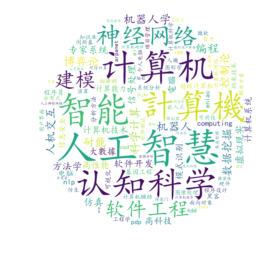

In [11]:
"*******Create word cloud***********"
font_path = 'simkai.ttf'
 
'''
获取一个圆形的mask
'''
def get_mask():
    x, y = np.ogrid[:1000, :1000]
    mask = (x - 500) ** 2 + (y - 500) ** 2 > 500 ** 2
    mask = 255 * mask.astype(int)
    return mask
 
'''
绘制词云
'''
def draw_word_cloud(word_cloud):
    wc = WordCloud(font_path = font_path,background_color="white", mask=get_mask())
    wc.generate_from_frequencies(word_cloud)
    # 隐藏x轴和y轴
    plt.axis("off")
    plt.imshow(wc, interpolation="bilinear")
    plt.show()
    plt.savefig('C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/word_cloud.png')

def draw():
    #logging.basicConfig(format="%(asctime)s:%(levelname)s:%(message)s", level=logging.INFO)
    model = Word2Vec.load("C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/model/zhwiki_news.word2vec")
    # 输入一个词找出相似的前100个词,默认是10个
    one_corpus = ["人工智能"]
    result = model.most_similar(one_corpus[0], topn=100)
    # 将返回的结果转换为字典,便于绘制词云
    word_cloud = dict()
    for sim in result:
        # print(sim[0],":",sim[1])
        word_cloud[sim[0]] = sim[1]
    # 绘制词云
    draw_word_cloud(word_cloud)

draw()


C:\Users\Zhang Bo Chao\Anaconda3\lib\site-packages\sklearn\neighbors\base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


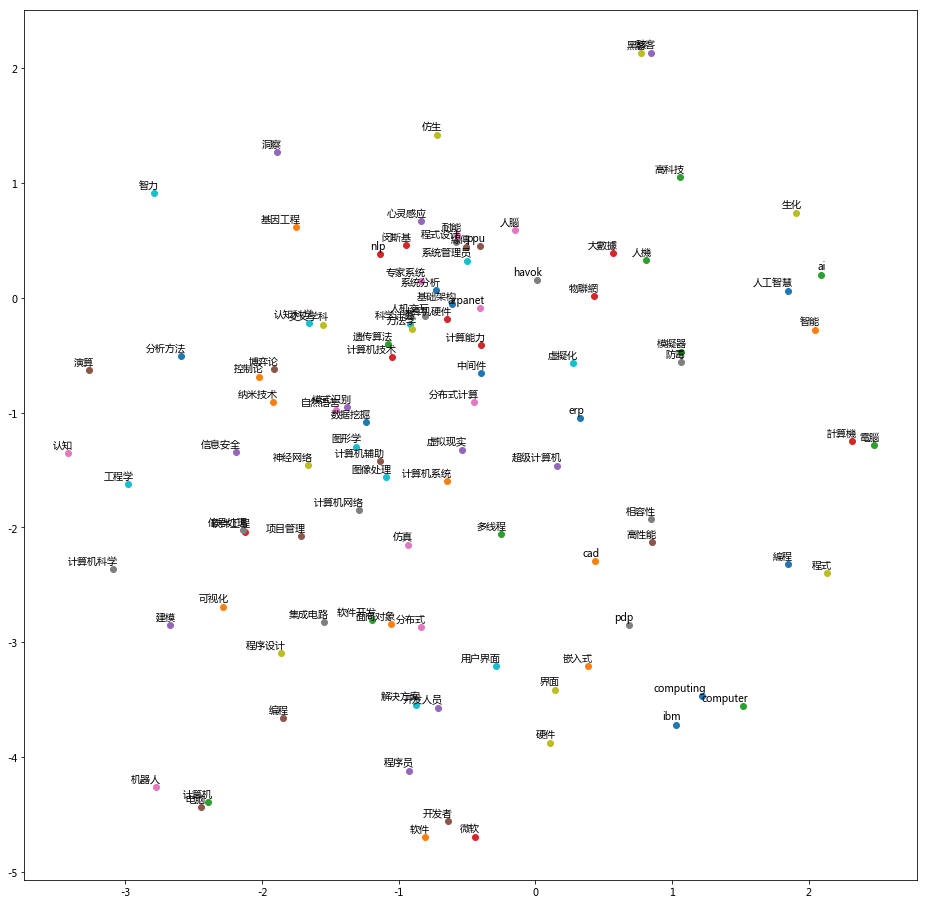

In [6]:
"********Plotting and save fig**********"
def tsne_plot_by_keyword(model, keyword):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []
    keywords = pd.Series(model.most_similar(keyword, topn = 100)) # return a pandas series, get the most similar 100 words to the keyword, plot only those words
    
    for word in keywords:
        tokens.append(model[word[0]])
        labels.append(word[0])
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')

    plt.savefig('C:/Users/Zhang Bo Chao/Desktop/AI集训营/NLP必修课/Lecture4/Assignment/graph_by_keyword.png')
    plt.show()
    
tsne_plot_by_keyword(model, keyword = '人工智能')